In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import moabb
moabb.set_log_level('info')

from moabb.datasets import BNCI2014001
dataset = BNCI2014001()
dataset.subject_list = dataset.subject_list[:2]

from moabb.paradigms import LeftRightImagery

p = LeftRightImagery()
timeseries, labels, table = p.get_data(dataset, dataset.subject_list[:2])

In [2]:
from sklearn.pipeline import make_pipeline

In [3]:
from moabb.pipelines.fbcsp_selectandcov import FBCSP_SelectAndCov
from moabb.pipelines.zeropad import ZeroPad

In [4]:
p = make_pipeline(
    FBCSP_SelectAndCov(U=20),
     ZeroPad(),
    'passthrough'
)

In [5]:
r = p.fit_transform(timeseries, labels)

In [6]:
r.shape

(576, 20, 28, 28)

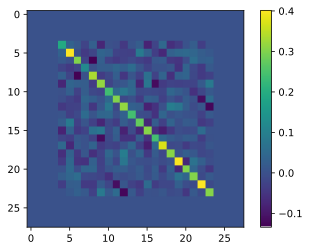

In [7]:
plt.imshow( r[0, 0, :, :] )
plt.colorbar()

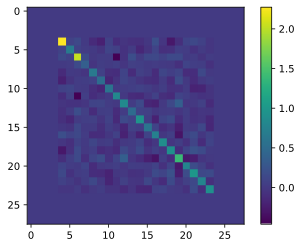

In [8]:
plt.imshow( r[1, 5, :, :] )
plt.colorbar()

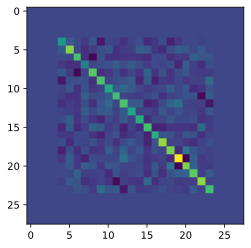

In [9]:
plt.imshow( r[0, 15, :, :] )

In [10]:
list( zip(range(0,20), labels[:20]) )

[(0, 'right_hand'),
 (1, 'left_hand'),
 (2, 'left_hand'),
 (3, 'right_hand'),
 (4, 'right_hand'),
 (5, 'left_hand'),
 (6, 'left_hand'),
 (7, 'left_hand'),
 (8, 'right_hand'),
 (9, 'right_hand'),
 (10, 'left_hand'),
 (11, 'left_hand'),
 (12, 'left_hand'),
 (13, 'right_hand'),
 (14, 'left_hand'),
 (15, 'right_hand'),
 (16, 'right_hand'),
 (17, 'left_hand'),
 (18, 'right_hand'),
 (19, 'left_hand')]

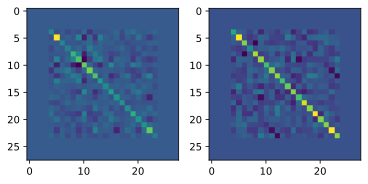

In [11]:
plt.subplot(1,2,1)
plt.imshow( r[13, 0, :, :] )
plt.subplot(1,2,2)
plt.imshow( r[0, 0, :, :] )

In [14]:
p.steps

[('fbcsp_selectandcov', FBCSP_SelectAndCov(U=20)),
 ('zeropad', ZeroPad()),
 ('passthrough', 'passthrough')]

In [16]:
selected_filters = p.steps[0][1].get_selected_band_filters()
selected_filters

[array([ 7.5, 14. ]),
 array([ 9., 12.]),
 array([19., 22.]),
 array([16., 22.]),
 array([17.5, 20.5]),
 array([ 7., 30.]),
 array([ 5., 14.]),
 array([12., 18.]),
 array([7., 9.]),
 array([15., 17.]),
 array([20., 25.]),
 array([15., 30.]),
 array([28., 32.]),
 array([11., 22.]),
 array([5., 8.]),
 array([ 7.5, 17.5]),
 array([23., 26.]),
 array([ 5., 20.]),
 array([ 5., 25.]),
 array([10., 20.])]

In [30]:
all_filters = p.steps[0][1].get_params().get('filters')
all_filters

[(7.5, 14),
 (11, 13),
 (10, 14),
 (9, 12),
 (19, 22),
 (16, 22),
 (26, 34),
 (17.5, 20.5),
 (7, 30),
 (5, 14),
 (11, 31),
 (12, 18),
 (7, 9),
 (15, 17),
 (25, 30),
 (20, 25),
 (5, 10),
 (10, 25),
 (15, 30),
 (10, 12),
 (23, 27),
 (28, 32),
 (12, 33),
 (11, 22),
 (5, 8),
 (7.5, 17.5),
 (23, 26),
 (5, 20),
 (5, 25),
 (10, 20)]

(0.0, 20.0)

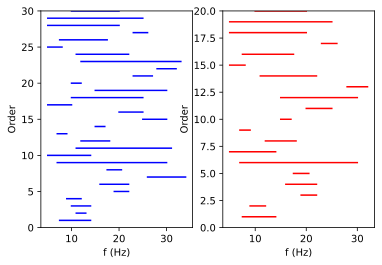

In [32]:
plt.subplot(1,2,1)
for i in range(len(all_filters)):
    plt.plot(all_filters[i], (i+1, i+1), 'b')
plt.xlabel('f (Hz)')
plt.ylabel('Order')
plt.ylim(0,30)


plt.subplot(1,2,2)
for i in range(len(selected_filters)):
    plt.plot(selected_filters[i], (i+1, i+1), 'r')
plt.xlabel('f (Hz)')
plt.ylabel('Order')
plt.ylim(0,20)

Different from EEG-2 Fig. 2, probably because datasets are different. 🤷